# **Predicting NBA Player Draft Order**

## **Contributions**

**Teja Nallagorla:** Worked on dataset curation and preprocessing, creating visualizations for data exploration, and final tutorial report creation.

**Priyansu Sahu:** Worked on analyzing data to perform a T-test comparing sprint speeds of first- and second-round picks and a chi-squared test to evaluate the association between wingspan and draft round.

**Jake Lawrence:** Worked on the machine learning analysis/visualization, and conducted the ANOVA test to determine if there is any difference in vertical leap in different draft groups.

## **Introduction**

The NBA Draft is one of the most anticipated events in professional basketball, as it is a pivotal moment in the future of both teams and players ([source](https://medium.com/@jriordan1/analyzing-nba-draft-picks-1581b2b0e9c7)). Predicting the draft order of players is a complex task influenced by factors such as individual performance, team needs, physical traits, and even external perceptions. Accurately forecasting when players will be selected can provide a deeper understanding of the draft process to teams, agents, and fans.

In this analysis, we aim to answer the key question: What factors most directly impact a player's draft position? Understanding the answer to this question is essential for improving player evaluations, optimizing team strategies, and shedding light on the draft process.

## **Data curation**

For our data, we will import a publicly available dataset from Kaggle: https://www.kaggle.com/datasets/wyattowalsh/basketball

This dataset includes information about 4800+ NBA players' draft round, draft pick number, team, physical traits, draft combine stats, game stats, etc. It also gets updated daily with the most recently available information. These properties make it ideal for us to use in the creation of our model.

In [ ]:
import kagglehub

# Import Kaggle dataset
path = kagglehub.dataset_download('wyattowalsh/basketball')

100%|██████████| 697M/697M [00:10<00:00, 68.2MB/s]

Extracting files...


After importing the dataset, we identify two files that are the most relevant for the creation of our model:

*   draft_history.csv
*   draft_combine_stats.csv

We then load the data from these files into Pandas dataframes.

In [ ]:
import numpy as np
import pandas as pd

# Load relevant data into dataframes
draft_history_df = pd.read_csv(f'{path}/csv/draft_history.csv')
draft_combine_stats_df = pd.read_csv(f'{path}/csv/draft_combine_stats.csv')

In [ ]:
# Examine the dataframe contents
display(draft_history_df)
display(draft_combine_stats_df)

,person_id,player_name,season,round_number,round_pick,overall_pick,draft_type,team_id,team_city,team_name,team_abbreviation,organization,organization_type,player_profile_flag
0,79299,Clifton McNeeley,1947,1,1,1,Draft,1610610031,Pittsburgh,Ironmen,PIT,Texas-El Paso,College/University,0
1,78109,Glen Selbo,1947,1,2,2,Draft,1610610035,Toronto,Huskies,HUS,Wisconsin,College/University,1
2,76649,Eddie Ehlers,1947,1,3,3,Draft,1610612738,Boston,Celtics,BOS,Purdue,College/University,1
3,79302,Walt Dropo,1947,1,4,4,Draft,1610610032,Providence,Steamrollers,PRO,Connecticut,College/University,0
4,77048,Dick Holub,1947,1,5,5,Draft,1610612752,New York,Knicks,NYK,Long Island-Brooklyn,College/University,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7985,1641771,Jalen Slawson,2023,2,24,54,Draft,1610612758,Sacramento,Kings,SAC,Furman,College/University,1
7986,1631209,Isaiah Wong,2023,2,25,55,Draft,1610612754,Indiana,Pacers,IND,Miami (FL),College/University,1
7987,1641844,Tarik Biberovic,2023,2,26,56,Draft,1610612763,Memphis,Grizzlies,MEM,Fenerbahce S.K. (Turkey),Other Team/Club,1
7988,1631218,Trayce Jackson-Davis,2023,2,27,57,Draft,1610612764,Washington,Wizards,WAS,Indiana,College/University,1


,season,player_id,first_name,last_name,player_name,position,height_wo_shoes,height_wo_shoes_ft_in,height_w_shoes,height_w_shoes_ft_in,...,spot_nba_break_right,spot_nba_corner_right,off_drib_fifteen_break_left,off_drib_fifteen_top_key,off_drib_fifteen_break_right,off_drib_college_break_left,off_drib_college_top_key,off_drib_college_break_right,on_move_fifteen,on_move_college
0,2001,12033,Adam,Allenspach,Adam Allenspach,C,83.50,6' 11.5'',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001,2240,Gilbert,Arenas,Gilbert Arenas,SG,74.25,6' 2.25'',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2001,2220,Brandon,Armstrong,Brandon Armstrong,SG,75.50,6' 3.5'',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2001,2203,Shane,Battier,Shane Battier,SF-PF,80.25,6' 8.25'',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2001,12034,Cookie,Belcher,Cookie Belcher,SG-PG,75.00,6' 3'',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,2023,1641705,Victor,Wembanyama,Victor Wembanyama,C,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1198,2023,1641727,Dariq,Whitehead,Dariq Whitehead,SG,77.75,6' 5.75'',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1199,2023,1641715,Cam,Whitmore,Cam Whitmore,SF,77.75,6' 5.75'',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1200,2023,1630592,Jalen,Wilson,Jalen Wilson,SF,77.50,6' 5.50'',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18-30,NaN,NaN,NaN,14-25


In [ ]:
# Merge both draft dataframes
draft_df = pd.merge(draft_history_df, draft_combine_stats_df, left_on='person_id', right_on='player_id')

display(draft_df)

,person_id,player_name_x,season_x,round_number,round_pick,overall_pick,draft_type,team_id,team_city,team_name,...,spot_nba_break_right,spot_nba_corner_right,off_drib_fifteen_break_left,off_drib_fifteen_top_key,off_drib_fifteen_break_right,off_drib_college_break_left,off_drib_college_top_key,off_drib_college_break_right,on_move_fifteen,on_move_college
0,199,Reggie Williams,1987,1,4,4,Draft,1610612746,Los Angeles,Clippers,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2198,Kwame Brown,2001,1,1,1,Draft,1610612764,Washington,Wizards,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2199,Tyson Chandler,2001,1,2,2,Draft,1610612746,Los Angeles,Clippers,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2201,Eddy Curry,2001,1,4,4,Draft,1610612741,Chicago,Bulls,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2202,Jason Richardson,2001,1,5,5,Draft,1610612744,Golden State,Warriors,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,1641771,Jalen Slawson,2023,2,24,54,Draft,1610612758,Sacramento,Kings,...,NaN,NaN,NaN,NaN,NaN,12-30,NaN,NaN,NaN,17-25
716,1631209,Isaiah Wong,2023,2,25,55,Draft,1610612754,Indiana,Pacers,...,NaN,NaN,NaN,NaN,NaN,23-30,NaN,NaN,NaN,17-25
717,1631218,Trayce Jackson-Davis,2023,2,27,57,Draft,1610612764,Washington,Wizards,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
718,1631218,Trayce Jackson-Davis,2023,2,27,57,Draft,1610612764,Washington,Wizards,...,NaN,NaN,NaN,NaN,NaN,18-30,NaN,NaN,NaN,12-25


After merging the two dataframes, we drop a large number of unnecessary columns.

In [ ]:
# Drop unnecessary columns
draft_df = draft_df.drop(columns=[
    'round_pick', 'draft_type', 'position', 'team_id',
    'team_city', 'team_abbreviation', 'player_profile_flag',
    'season_y', 'player_id', 'first_name',
    'last_name', 'player_name_y', 'height_wo_shoes_ft_in',
    'height_w_shoes', 'height_w_shoes_ft_in', 'wingspan_ft_in',
    'standing_reach_ft_in', 'modified_lane_agility_time', 'spot_fifteen_corner_left',
    'spot_fifteen_break_left', 'spot_fifteen_top_key', 'spot_fifteen_break_right',
    'spot_fifteen_corner_right', 'spot_college_corner_left', 'spot_college_break_left',
    'spot_college_top_key', 'spot_college_break_right', 'spot_college_corner_right',
    'spot_nba_corner_left', 'spot_nba_break_left', 'spot_nba_top_key',
    'spot_nba_break_right', 'spot_nba_corner_right', 'off_drib_fifteen_break_left',
    'off_drib_fifteen_top_key', 'off_drib_fifteen_break_right', 'off_drib_college_break_left',
    'off_drib_college_top_key', 'off_drib_college_break_right', 'on_move_fifteen',
    'on_move_college'])

# Drop duplicates
draft_df = draft_df.drop_duplicates()

# Examine the type and number of missing values for each dataframe column
display(pd.DataFrame({'Data Type': draft_df.dtypes, 'Missing Values': draft_df.isna().sum()}))

,Data Type,Missing Values
person_id,int64,0
player_name_x,object,0
season_x,int64,0
round_number,int64,0
overall_pick,int64,0
team_name,object,0
organization,object,0
organization_type,object,0
height_wo_shoes,float64,37
weight,float64,38


Many of the remaining columns that we want to use for the creation of our model have missing values. To resolve this issue without losing a large part of our dataset, we use [imputation](https://airbyte.com/data-engineering-resources/data-imputation). Specifically, we impute the missing values by averaging values from other players of similar height. We do this because we don't want to overgeneralize and use population averages, but we also don't want to undergeneralize and use multiple characteristics (other than height) to determine imputation values.

In [ ]:
# Drop rows with missing height_wo_shoes
draft_df = draft_df.dropna(subset=['height_wo_shoes'])

# Create bins based on height_wo_shoes
bins = []
max_height = draft_df['height_wo_shoes'].max()
min_height = draft_df['height_wo_shoes'].min()

while min_height <= max_height:
    bins.append(min_height)
    min_height += 1

# Add new column containing the height_bucket of each entry
draft_df['height_bucket'] = pd.cut(draft_df['height_wo_shoes'], bins=bins, include_lowest=True)

# Function to impute missing values of a specified col
def impute_by_height(df, col):
    df_copy = df.copy()
    global_median = df_copy[col].median()

    for bucket in df_copy['height_bucket'].unique():
      bucket_rows = df_copy['height_bucket'] == bucket
      bucket_median = df_copy.loc[bucket_rows, col].median()

      lower_bucket_median = None
      upper_bucket_median = None

      if bucket > df_copy['height_bucket'].min():
        lower_bucket = bucket - 1
        lower_bucket_rows = df_copy['height_bucket'] == lower_bucket
        lower_bucket_median = df_copy.loc[lower_bucket_rows, col].median()

      if bucket < df_copy['height_bucket'].max():
        upper_bucket = bucket + 1
        upper_bucket_rows = df_copy['height_bucket'] == upper_bucket
        upper_bucket_median = df_copy.loc[upper_bucket_rows, col].median()

      # If bucket_median is not null, use it
      if pd.notna(bucket_median):
        df_copy.loc[bucket_rows & df_copy[col].isna(), col] = bucket_median
      else:
        combined_median = []
        if pd.notna(lower_bucket_median):
          combined_median.append(lower_bucket_median)
        if pd.notna(upper_bucket_median):
          combined_median.append(upper_bucket_median)

        # Else use the average of medians from the next highest and next lowest buckets
        if combined_median:
          df_copy.loc[bucket_rows & df_copy[col].isna(), col] = sum(combined_median) / len(combined_median)
        # Else use the global_median from all buckets
        else:
          df_copy.loc[bucket_rows & df_copy[col].isna(), col] = global_median

    return df_copy[col]

# Impute missing values
draft_df['weight'] = impute_by_height(draft_df, 'weight')
draft_df['wingspan'] = impute_by_height(draft_df, 'wingspan')
draft_df['standing_reach'] = impute_by_height(draft_df, 'standing_reach')
draft_df['body_fat_pct'] = impute_by_height(draft_df, 'body_fat_pct')
draft_df['hand_length'] = impute_by_height(draft_df, 'hand_length')
draft_df['hand_width'] = impute_by_height(draft_df, 'hand_width')
draft_df['standing_vertical_leap'] = impute_by_height(draft_df, 'standing_vertical_leap')
draft_df['max_vertical_leap'] = impute_by_height(draft_df, 'max_vertical_leap')
draft_df['lane_agility_time'] = impute_by_height(draft_df, 'lane_agility_time')
draft_df['three_quarter_sprint'] = impute_by_height(draft_df, 'three_quarter_sprint')
draft_df['bench_press'] = impute_by_height(draft_df, 'bench_press')

# Drop height_bucket column
draft_df = draft_df.drop(columns=['height_bucket'])

# Verify that the imputation worked
display(pd.DataFrame({'Data Type': draft_df.dtypes, 'Missing Values': draft_df.isna().sum()}))

,Data Type,Missing Values
person_id,int64,0
player_name_x,object,0
season_x,int64,0
round_number,int64,0
overall_pick,int64,0
team_name,object,0
organization,object,0
organization_type,object,0
height_wo_shoes,float64,0
weight,float64,0


## **Exploratory data analysis**
Now that we've cleaned and prepared our dataset, we can conduct some basic exploratory data analysis to better understand it. To do this, we will conduct a [Chi-squared test](https://www.investopedia.com/terms/c/chi-square-statistic.asp), a [T-test](https://www.investopedia.com/terms/t/t-test.asp), and an [ANOVA test](https://www.investopedia.com/terms/a/anova.asp) to look for correlations between columns.



In [ ]:
# Examine summary statistics
display(draft_df.describe())

,person_id,season_x,round_number,overall_pick,height_wo_shoes,weight,wingspan,standing_reach,body_fat_pct,hand_length,hand_width,standing_vertical_leap,max_vertical_leap,lane_agility_time,three_quarter_sprint,bench_press
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,7.847619e+05,2012.932650,1.461201,28.838946,77.667643,214.567936,82.587262,103.707174,6.959107,8.713763,9.437225,29.591874,35.151903,11.307094,3.272152,9.990483
std,7.316532e+05,6.336472,0.498858,16.429101,3.203606,24.682577,3.850693,4.758606,2.343462,0.434560,0.592071,2.766194,3.334438,0.510807,0.125907,4.595546
min,1.990000e+02,1987.000000,1.000000,1.000000,67.750000,161.000000,70.000000,89.500000,2.700000,7.500000,7.250000,21.500000,25.000000,9.650000,2.960000,0.000000
25%,2.016135e+05,2008.000000,1.000000,15.000000,75.500000,196.000000,79.750000,100.000000,5.400000,8.500000,9.000000,27.500000,33.000000,10.980000,3.190000,8.000000
50%,2.031210e+05,2012.000000,1.000000,28.000000,77.750000,212.800000,82.750000,104.000000,6.500000,8.750000,9.500000,29.750000,35.000000,11.210000,3.255000,10.000000
75%,1.629007e+06,2018.000000,2.000000,43.000000,80.250000,230.500000,85.375000,107.000000,7.900000,9.000000,9.750000,31.500000,37.000000,11.610000,3.340000,12.000000
max,1.641775e+06,2023.000000,2.000000,60.000000,85.750000,314.000000,94.000000,117.000000,21.000000,10.250000,11.500000,39.500000,44.500000,13.200000,3.810000,26.000000


### **Chi-Squared Test:**

We use the Chi-squared test to determine if here is any association between a player's wingspan (the distance between the tips of a player's fingers when they extend their arms out to the side) and their draft position.

Null Hypothesis: There is no significant association between a player's wingspan and their draft position (round and overall pick).

Alternative Hypothesis: There is a significant association between a player's wingspan and their draft position (round and overall pick).

P-value: 0.022282804770026216


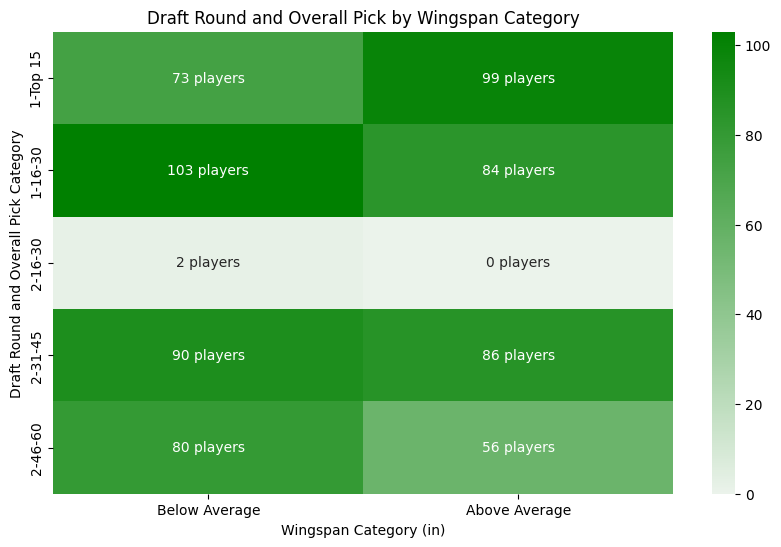

In [ ]:
# Conduct statistical test 1: [Chi-Squared]

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Categorize overall_pick
draft_df['overall_pick_category'] = pd.cut(draft_df['overall_pick'], bins=[1, 15, 30, 45, 60], labels=['Top 15', '16-30', '31-45', '46-60'])

# Categorize wingspan
draft_df['wingspan_category'] = pd.cut(draft_df['wingspan'], bins=[draft_df['wingspan'].min(), draft_df['wingspan'].median(), draft_df['wingspan'].max()], labels=['Below Average', 'Above Average'])

contingency_table = pd.crosstab([draft_df['round_number'], draft_df['overall_pick_category']], draft_df['wingspan_category'])

chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"P-value: {p_value}")

plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(contingency_table, annot=True, cmap=sns.light_palette("green", as_cmap=True), fmt="d")
for t in heatmap.texts:
    t.set_text(t.get_text() + " players")
plt.title('Draft Round and Overall Pick by Wingspan Category')
plt.xlabel('Wingspan Category (in)')
plt.ylabel('Draft Round and Overall Pick Category')
plt.show()

**Conclusion:** Based on the Chi-squared test results (p-value = 0.022 < a = 0.05), we reject the null hypothesis and can conclude that there is a statistically significant association between a player's wingspan and their draft position (round and overall pick).

### **T-Test:**

We use the T-test to determine if here is any significant difference in sprint speed between players that were picked in the first round and second round.

Null Hypothesis: There is no significant difference in sprint speed between first-round and second-round picks.

Alternative Hypothesis: There is a significant difference in sprint speed between first-round and second-round picks.

T-statistic: -2.4796248477759724
P-value: 0.013392877283654346


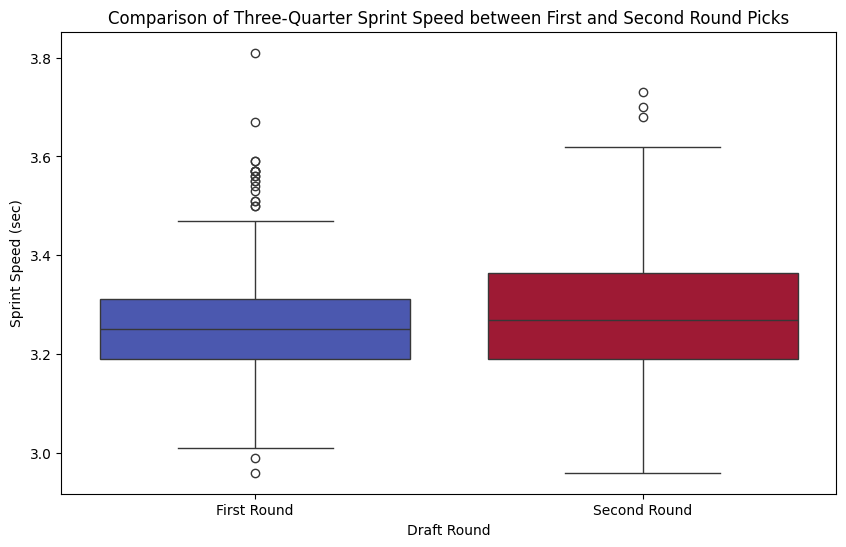

In [ ]:
# Conduct statistical test 2: [T-Test]

# Get sprint times for all players in round 1 and then round 2
first_round_sprint = draft_df[draft_df['round_number'] == 1]['three_quarter_sprint']
second_round_sprint = draft_df[draft_df['round_number'] == 2]['three_quarter_sprint']

# Conduct t-test
t_stat, p_value = stats.ttest_ind(first_round_sprint, second_round_sprint)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

plt.figure(figsize=(10, 6))

sns.boxplot(x=draft_df['round_number'], y=draft_df['three_quarter_sprint'], hue=draft_df['round_number'], palette="coolwarm", legend=False)
plt.title('Comparison of Three-Quarter Sprint Speed between First and Second Round Picks')
plt.xlabel('Draft Round')
plt.ylabel('Sprint Speed (sec)')
plt.xticks([0, 1], ['First Round', 'Second Round'])
plt.show()

**Conclusion:** Based on the T-test results (p-value = 0.013 < a = 0.05), we reject the null hypothesis and can conclude that there is a significant difference in sprint speed between first-round and second-round picks.

### **ANOVA Test:**

We use the ANOVA test to determine if here may be differences in vertical leap performance across draft groups.

Null Hypothesis: There is no significant difference in vertical leap performance (both standing and maximum) across different draft groups.

Alternative Hypothesis: There is a significant difference in vertical leap performance across different draft groups.

Standing Vertical Leap ANOVA results: F-value = 0.49, p-value = 0.692
Max Vertical Leap ANOVA results: F-value = 0.76, p-value = 0.516


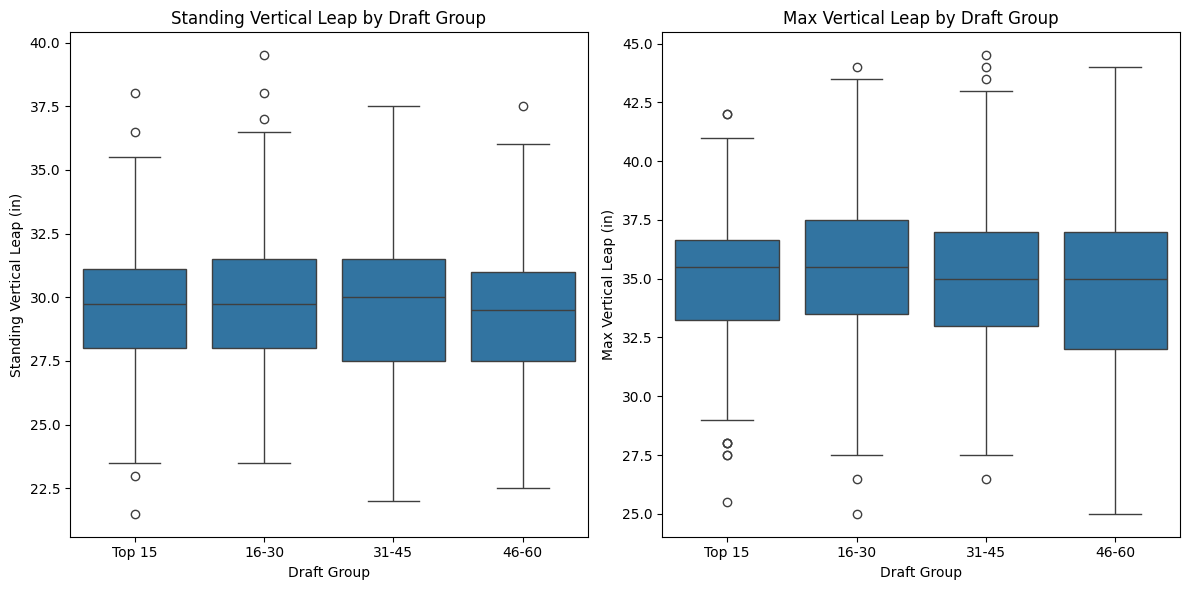

In [ ]:
# Conduct statistical test 3: [ANOVA]

groups = draft_df.groupby('overall_pick_category', observed=False)
standing_leap_by_group = [group['standing_vertical_leap'].dropna() for name, group in groups]
max_leap_by_group = [group['max_vertical_leap'].dropna() for name, group in groups]

fvalue_standing, pvalue_standing = stats.f_oneway(*standing_leap_by_group)

fvalue_max, pvalue_max = stats.f_oneway(*max_leap_by_group)

print("Standing Vertical Leap ANOVA results: F-value = {:.2f}, p-value = {:.3f}".format(fvalue_standing, pvalue_standing))
print("Max Vertical Leap ANOVA results: F-value = {:.2f}, p-value = {:.3f}".format(fvalue_max, pvalue_max))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='overall_pick_category', y='standing_vertical_leap', data=draft_df)
plt.title('Standing Vertical Leap by Draft Group')
plt.xlabel('Draft Group')
plt.ylabel('Standing Vertical Leap (in)')

plt.subplot(1, 2, 2)
sns.boxplot(x='overall_pick_category', y='max_vertical_leap', data=draft_df)
plt.title('Max Vertical Leap by Draft Group')
plt.xlabel('Draft Group')
plt.ylabel('Max Vertical Leap (in)')

plt.tight_layout()
plt.show()

**Conclusion:** Based on these ANOVA test results (p-value = 0.692 > a = 0.05 and p-value = 0.516 > a = 0.05), we fail to reject the null hypothesis and can conclude that there is no statistically significant difference in either standing or maximum vertical leap performance across different draft groups. In other words, the data does not provide enough evidence to support the claim that draft position has a significant impact on a player's vertical leap abilities.

## **Primary analysis**

To help predict whether a basketball player will be drafted in the first or second round based on the features collected in the dataset, we will train a machine learning model on the dataset. For this specific dataset, we will use a [classification machine learning algorithm](https://www.datacamp.com/blog/classification-machine-learning). This is because the label we are trying to predict (round_number) is a categorical variable with two categories: first round (classified as 1) and second round (classified as 2).
We are trying to predict the draft round for a new player that is not currently in the provided data.

We will do this using the [Random Forest Classification Algorithm](https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/). This is because Random Forest is an accurate classification algorithm. It works by creating multiple decision trees during training and then combines their outputs to make the final classification. This approach reduces the risk of overfitting and improves prediction accuracy, making it a great choice for our draft round prediction task.

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

columns_to_drop = ['person_id', 'player_name_x', 'season_x', 'team_name',
                   'organization', 'organization_type', 'overall_pick_category',
                   'wingspan_category']

# Drop target variables plus the string variables defined above
X = draft_df.drop(columns=columns_to_drop + ['round_number', 'overall_pick'], axis=1)
y = draft_df['round_number']
X_encoded = X.copy()
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=random_state)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=random_state)

# Cross-validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=random_state)
cv_scores = cross_val_score(rf_classifier, X_train_scaled, y_train, cv=k_fold, scoring='accuracy')

rf_classifier.fit(X_train_scaled, y_train)

y_pred = rf_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Cross-Validation Mean Accuracy:", cv_scores.mean())
print("Cross-Validation Accuracy Standard Deviation:", cv_scores.std())

Test Set Accuracy: 0.5658536585365853
Classification Report:
              precision    recall  f1-score   support

           1       0.58      0.69      0.63       110
           2       0.54      0.42      0.47        95

    accuracy                           0.57       205
   macro avg       0.56      0.56      0.55       205
weighted avg       0.56      0.57      0.56       205

Cross-Validation Mean Accuracy: 0.5709429824561403
Cross-Validation Accuracy Standard Deviation: 0.04162711650180502


## **Visualization**

We will now visualize the results of our primary analysis using a [confusion matrix](https://www.geeksforgeeks.org/confusion-matrix-machine-learning/).

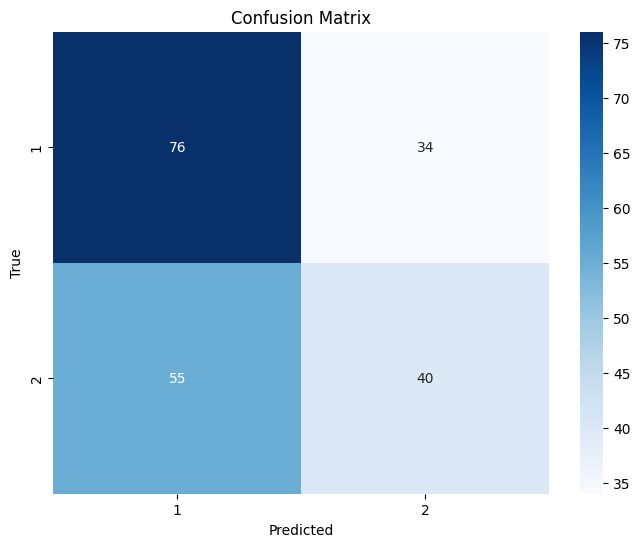

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## **Insights and conclusions**

Our Random Forest Classifier achieved an accuracy of approximately 57% when predicting whether a player would be drafted in round 1 or round 2. The model demonstrated medium precision and recall for both classes, highlighting its capability to distinguish between the two draft rounds appropriately. This performance suggests that the chosen features of players contribute to the classification task.


In this project, we followed a data science route to predict a player's draft round based on various physical and performance metrics. The process included:
* Data acquisition and preprocessing: Cleaning and preparing the dataset, dropping irrelevant columns, and scaling features to ensure proper model performance.
* Exploratory data analysis: Examining the data to identify trends and relationships between features and draft outcomes.
* Machine learning analysis: Using a Random Forest Classifier to predict draft rounds, along with techniques such as cross-validation to ensure model reliability. Performance metrics like accuracy and classification reports provided insights into the model's success.

This project serves as a valuable example of how data science can be applied to analyze sports data and can predict meaningful outcomes. Whether you're new to data science or an experienced practitioner, we hope this tutorial offers a clear and engaging walkthrough of our process!